Imports


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder



Dataset loading

In [22]:
def load_or_create_dataset(filepath='dataset.csv', create_new=False, n_samples=1000, n_features=20):
    if create_new:
        data = np.random.rand(n_samples, n_features)
        labels = np.random.randint(0, 2, n_samples)
        dataset = pd.DataFrame(data)
        dataset['label'] = labels
        dataset.to_csv(filepath, index=False)
    else:
        dataset = pd.read_csv(filepath)
    
    return dataset

# Load or create the dataset
dataset = load_or_create_dataset(create_new=False)
#label encoding
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])
dataset['day'] = le.fit_transform(dataset['day'])
dataset['time'] = le.fit_transform(dataset['time'])


#one hot ecoding
#dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'day', 'time'])
#convert true and false to 1 and 0


#change the column name of the 'tip' column to 'label'
label_name = 'tip'
dataset.rename(columns={label_name:'label'}, inplace=True)

dataset.head()

,total_bill,label,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


Dataset Visualization and statistics

1. Visualize the following metrics:
    - Pair plot of all variables
    - Basic statistics including mean, std etc



C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

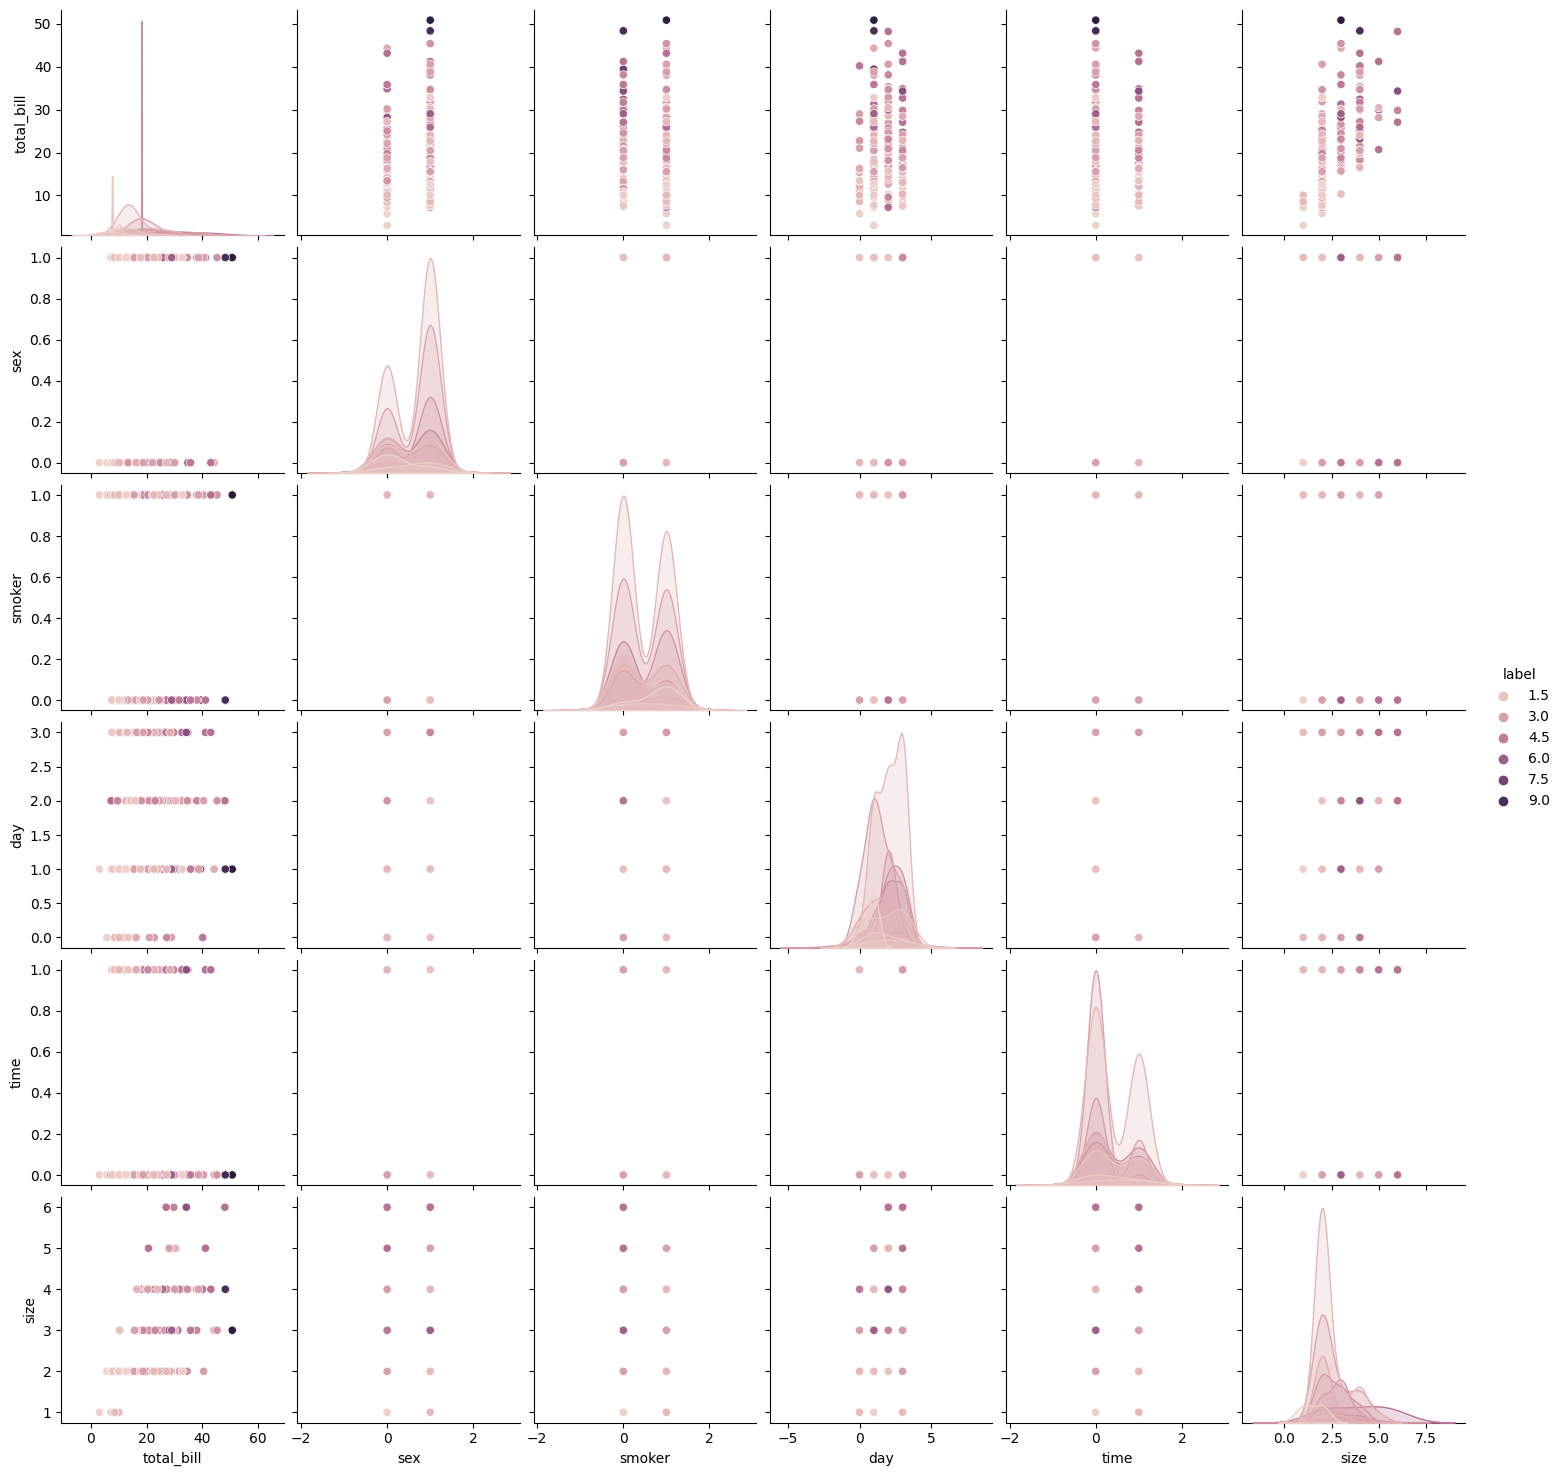

,total_bill,label,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [23]:
#create and show a pair plot of the clusters
sns.pairplot(dataset, hue='label')
plt.show()

#show the basic statistics of the dataset
dataset.describe()

Clustering Phase:

Cluster the dataset into different clusters
1. We will use 4 different clustering algorithms:
    - K-Means
    - DBSCAN
    - GMM
    - Spectral Clustering

2. Generate meaningfull insights into each clustering algorithm and outcome:
    - cardinality

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype,

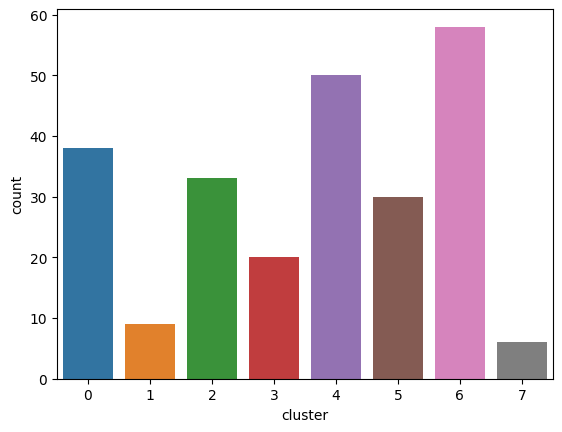

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

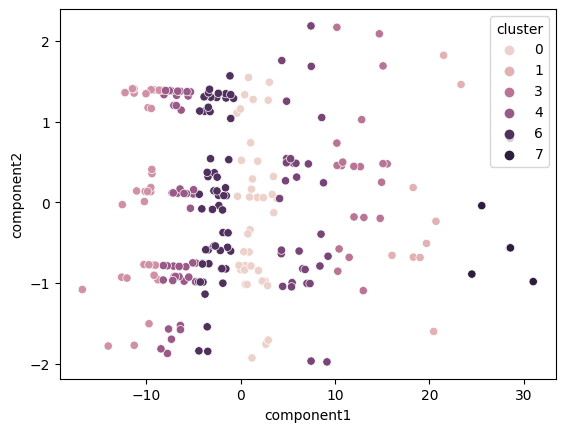

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

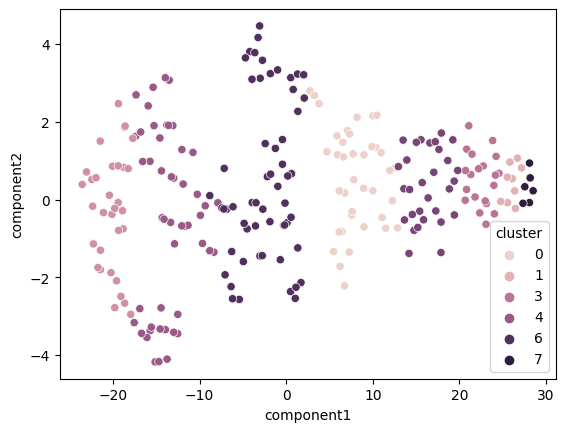

In [24]:
#kmeans clustering
def cluster_dataset_kmeans(dataset, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    features = dataset.drop('label', axis=1).values
    clusters = kmeans.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

#dbscan clustering
def cluster_dataset_dbscan(dataset, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    features = dataset.drop('label', axis=1).values
    clusters = dbscan.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

# Cluster the dataset
n_clusters = 8
dataset, clusters = cluster_dataset_kmeans(dataset, n_clusters=n_clusters)
dataset.head()

#graph the clusters
sns.countplot(x='cluster', data=dataset)
plt.show()

#create a pca plot of the clusters
pca = PCA(n_components=2)
components = pca.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.show()

#create a T-SNE plot of the clusters
tsne = TSNE(n_components=2)
components = tsne.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.show()



Model and Optimizer Definitions

In [25]:
#Define the model architecture
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(CustomModel, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(in_size, hidden_size))
            layers.append(nn.ReLU())
            in_size = hidden_size
        layers.append(nn.Linear(in_size, output_size))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)
    
#Define the custom optimizer
class COSGD(optim.Optimizer):
    def __init__(self, params, lr=1e-3):
        defaults = dict(lr=lr)
        super(COSGD, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                p.data.add_(-group['lr'], d_p)
        
        return loss

#write a method to take in a tensor of gradient update values and convert them to a vector
def flatten_grads(grads):
    grads = torch.cat([grad.view(-1) for grad in grads])
    return grads

#write a method to take in a vector of gradient update values and convert them to a tensor
def unflatten_grads(flattened_grads, model):
    grads = []
    start = 0
    for param in model.parameters():
        end = start + param.numel()
        grads.append(flattened_grads[start:end].view(param.size()))
        start = end
    return grads

#write a method to perform the gramm schmidt process that takes in a a set of tensors of gradient updates for each cluster and returns a set of orthogonalized tensors for each cluster
def orthogonalize_grads(grads, model):
    #convert each tensor in each cluster to a vector
    flattened_grads = [flatten_grads(cluster_grads) for cluster_grads in grads]
    #now we have a set of vectors, we can perform the gram schmidt process
    ortho_grads = []
    for i, grad in enumerate(flattened_grads):
        for j in range(i):
            #subtract the projection of the current vector onto the previous vectors
            grad = grad - (grad @ flattened_grads[j]) / (flattened_grads[j] @ flattened_grads[j]) * flattened_grads[j]
        ortho_grads.append(grad)
    #convert the vectors back to tensors
    ortho_grads = [unflatten_grads(grad, model) for grad in ortho_grads]
    return ortho_grads



Control Model

In [26]:
# Define the training loop for the control model (standard)
def train_model(model, optimizer, dataloader, loss_function, epochs=10):
    criterion = loss_function
    model.train()
    
    for epoch in range(epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        #print the loss every epoch
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
            
    return model


#prepare data loader for the control model
features = dataset.drop(['label', 'cluster'], axis=1).values
labels = dataset['label'].values
tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader_control = DataLoader(tensor_data, batch_size=32, shuffle=True)


COSGD Model

In [27]:
# Prepare data loaders for each cluster for the COSGD optimizer and name them as such
dataloaders = {}
for cluster in range(n_clusters):
    cluster_data = dataset[dataset['cluster'] == cluster]
    features = cluster_data.drop(['label', 'cluster'], axis=1).values
    labels = cluster_data['label'].values
    tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
    dataloaders[f'cluster_{cluster}'] = DataLoader(tensor_data, batch_size=32, shuffle=True)

#write a method to train the model using COSGD, this method will train the model over each cluster without updating the model parameters. It will store each clusters gradient updates in a list and then orthogonalize the gradients. The orthogonalized gradients will then be used to update the model parameters by applying each set of orthogonalized gradients to the model parameters
def train_model_cosgd(model, optimizer, dataloaders, loss_function, epochs=10):
    criterion = loss_function
    model.train()
    
    for epoch in range(epochs):
        grads = []
        for cluster, dataloader in dataloaders.items():
            for inputs, labels in dataloader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                grads.append([param.grad.clone() for param in model.parameters()])
        
        grads = orthogonalize_grads(grads, model)
        for grad in grads:
            for param, g in zip(model.parameters(), grad):
                param.grad = g
        optimizer.step()

        #print the loss every epoch
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
    
    return model


Define the models

In [30]:
# Define model architectures
input_size = dataset.shape[1] - 2  # excluding label and cluster columns
hidden_layers = [6]
output_size = 1
model_control = CustomModel(input_size, hidden_layers, output_size)
model_cosgd = CustomModel(input_size, hidden_layers, output_size)

# Define optimizers
optimizer_control = optim.SGD(model_control.parameters(), lr=0.01)
optimizer_cosgd = COSGD(model_cosgd.parameters(), lr=0.01)

Train the models

In [31]:
#create loss function
loss_function = nn.MSELoss()

# Train models
start_time_control = time.time()
model_control = train_model(model_control, optimizer_control, dataloader_control, loss_function, epochs=10)
end_time_control = time.time()

start_time_cosgd = time.time()
model_cosgd = train_model_cosgd(model_cosgd, optimizer_cosgd, dataloaders, loss_function, epochs=10)
end_time_cosgd = time.time()

# Print results
print(f"SGD Training Time: {end_time_control - start_time_control:.2f} seconds")
print(f"COSGD Training Time: {end_time_cosgd - start_time_cosgd:.2f} seconds")

Epoch 1/10, Loss: 1.713889479637146
Epoch 2/10, Loss: 1.5193535089492798
Epoch 3/10, Loss: 1.5893330574035645
Epoch 4/10, Loss: 2.1458072662353516
Epoch 5/10, Loss: 2.6982882022857666
Epoch 6/10, Loss: 2.397728204727173
Epoch 7/10, Loss: 2.3719944953918457
Epoch 8/10, Loss: 2.5569396018981934
Epoch 9/10, Loss: 4.486376762390137
Epoch 10/10, Loss: 0.8747806549072266
Epoch 1/10, Loss: 7.729104042053223
Epoch 2/10, Loss: 7.60214900970459
Epoch 3/10, Loss: 7.598043441772461
Epoch 4/10, Loss: 7.594172954559326
Epoch 5/10, Loss: 7.591147422790527
Epoch 6/10, Loss: 7.588346004486084
Epoch 7/10, Loss: 7.58612585067749
Epoch 8/10, Loss: 7.5842742919921875
Epoch 9/10, Loss: 7.582589149475098
Epoch 10/10, Loss: 7.581142902374268
SGD Training Time: 0.04 seconds
COSGD Training Time: 0.05 seconds


Analyse the models performance
TODO - decide on metrics to use 
